# Gun Violence Analysis

by Kaamil Nailal Muna

#### Problem Statement
- The Gun Violence dataset contains detailed information about incidents involving firearms, including data on the location, number of casualties, types of guns used, and characteristics of the incidents.
- The objective of this project is to analyze the data and extract meaningful insights to understand patterns and factors contributing to gun violence. Additionally, the analysis aims to identify potential areas for intervention and policy recommendations to reduce the occurrence of gun-related incidents.
- Specific questions to be addressed include: What is the geographical distribution of gun violence incidents across states and cities? Are there specific characteristics or patterns associated with incidents that result in a higher number of casualties? What types of guns are most commonly involved in incidents? Are there demographic factors, such as age, gender, or relationships between participants, that correlate with the occurrence of gun violence?
- By addressing these questions, the analysis seeks to contribute to the development of evidence-based strategies and policies to mitigate the impact of gun violence. Recommendations may involve targeted interventions, awareness campaigns, or legislative measures aimed at reducing the frequency and severity of gun-related incidents. This analysis is crucial for fostering public safety and promoting informed decision-making at both community and policy levels.

#### Assumption
- Reporting Accuracy: The assumption that the data accurately reflects the actual occurrences of gun violence incidents. It is presumed that the reported incidents are comprehensive and not significantly underreported or overreported.
- Consistency in Data Recording: The assumption that there is consistency in how the data is recorded across different states, cities, and reporting agencies. Consistent recording practices are important for ensuring reliability and comparability of the data.
- Completeness of Information: The assumption that key information, such as the number of killed and injured individuals, participant details, and incident characteristics, is adequately documented for the majority of reported incidents. Incomplete or missing information may impact the comprehensiveness of the analysis.
- Accuracy of Geographical Information: The assumption that geographical information, including state, city, and location coordinates (latitude and longitude), is accurate and properly recorded. Geographical accuracy is crucial for spatial analysis and identifying regional patterns.
- Consistency in Age and Gender Reporting: The assumption that participant age and gender information is consistently and accurately reported. Inaccuracies or inconsistencies in demographic data could affect the analysis of the demographics associated with gun violence.
- Reliability of Source URLs: If source URLs are provided, the assumption could be made that these URLs lead to reliable and verifiable information sources. This assumption is important if external validation or additional context is needed for certain incidents.
- No Systemic Bias: The assumption that there is no systemic bias in the reporting of gun violence incidents, such as biases in law enforcement reporting or media coverage. Systemic bias could influence the analysis and interpretation of the data.
Temporal Consistency: The assumption that the temporal aspects of the data, including the date of incidents, are consistently recorded and accurately represent the timeline of events. This is important for analyzing trends and seasonality in gun violence.

#### Research Question
- What is the distribution of incidents of firearm violence by state? Do certain areas have higher rates of gun violence than others?
- Are there time trends in gun violence? Can we identify specific seasons or periods that might influence the frequency of occurrence?
- What are the most common types of firearms involved in incidents? Are there certain patterns in event characteristics, such as specific places that can be identified?
- What is the distribution of incidents of firearm violence based on age groups and gender? Is there a correlation between demographic factors and levels of violence?
- What is the distribution of the number of killed and injured victims? Is there a pattern in relation to the highest number of shooting incidents by state?

# Execution

In [70]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' %x)
pd.options.display.float_format = '{:,.0f}'.format
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [71]:
df = pd.read_csv('gun-violence-data_01-2013_03-2018.csv')
df

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62,35
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56,13
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40,28
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,http://www.gunviolencearchive.org/incident/108...,http://www.klfy.com/news/local/rayne-woman-cha...,False,...,0::25,0::Adult 18+,0::Female,0::Jhkeya Tezeno,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.klfy.com/news/local/rayne-woman-cha...,NaN,NaN
239673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,False,...,1::21,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.ksla.com/story/37854648/man-wanted-...,23,31
239674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,False,...,0::21,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...,85,7
239675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.org/incident/108...,https://www.chron.com/news/houston-tex

In [72]:
df.shape

(239677, 29)

In [73]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_id                  239677 non-null  int64  
 1   date                         239677 non-null  object 
 2   state                        239677 non-null  object 
 3   city_or_county               239677 non-null  object 
 4   address                      223180 non-null  object 
 5   n_killed                     239677 non-null  int64  
 6   n_injured                    239677 non-null  int64  
 7   incident_url                 239677 non-null  object 
 8   source_url                   239209 non-null  object 
 9   incident_url_fields_missing  239677 non-null  bool   
 10  congressional_district       227733 non-null  float64
 11  gun_stolen                   140179 non-null  object 
 12  gun_type                     140226 non-null  object 
 13 

In [75]:
df.duplicated().any()

False

In [76]:
df_original = df.copy()

In [77]:
data_info = df.info()
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_id                  239677 non-null  int64  
 1   date                         239677 non-null  object 
 2   state                        239677 non-null  object 
 3   city_or_county               239677 non-null  object 
 4   address                      223180 non-null  object 
 5   n_killed                     239677 non-null  int64  
 6   n_injured                    239677 non-null  int64  
 7   incident_url                 239677 non-null  object 
 8   source_url                   239209 non-null  object 
 9   incident_url_fields_missing  239677 non-null  bool   
 10  congressional_district       227733 non-null  float64
 11  gun_stolen                   140179 non-null  object 
 12  gun_type                     140226 non-null  object 
 13 

In [78]:
columns_with_fewest_values = df.count().nsmallest(5).index
columns_with_fewest_values

for col in columns_with_fewest_values:
    value_counts = df[col].value_counts().sum()
    print(f"Jumlah nilai untuk Kolom {col}:\n{value_counts}")

Jumlah nilai untuk Kolom participant_relationship:
15774
Jumlah nilai untuk Kolom location_description:
42089
Jumlah nilai untuk Kolom participant_name:
117424
Jumlah nilai untuk Kolom gun_stolen:
140179
Jumlah nilai untuk Kolom gun_type:
140226


In [79]:
df = df.fillna(0)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_id                  239677 non-null  int64  
 1   date                         239677 non-null  object 
 2   state                        239677 non-null  object 
 3   city_or_county               239677 non-null  object 
 4   address                      239677 non-null  object 
 5   n_killed                     239677 non-null  int64  
 6   n_injured                    239677 non-null  int64  
 7   incident_url                 239677 non-null  object 
 8   source_url                   239677 non-null  object 
 9   incident_url_fields_missing  239677 non-null  bool   
 10  congressional_district       239677 non-null  float64
 11  gun_stolen                   239677 non-null  object 
 12  gun_type                     239677 non-null  object 
 13 

## Research Answer

#### 1. What is the distribution of incidents of firearm violence by state? Do certain areas have higher rates of gun violence than others?

In [81]:
merged_df = pd.merge((df['state'].value_counts().reset_index()), (df.groupby('state')['incident_id'].count().reset_index()), on='state')
print(merged_df)

                   state  count  incident_id
0               Illinois  17556        17556
1             California  16306        16306
2                Florida  15029        15029
3                  Texas  13577        13577
4                   Ohio  10244        10244
5               New York   9712         9712
6           Pennsylvania   8929         8929
7                Georgia   8925         8925
8         North Carolina   8739         8739
9              Louisiana   8103         8103
10             Tennessee   7626         7626
11        South Carolina   6939         6939
12              Missouri   6631         6631
13              Michigan   6136         6136
14         Massachusetts   5981         5981
15              Virginia   5949         5949
16               Indiana   5852         5852
17              Maryland   5798         5798
18               Alabama   5471         5471
19            New Jersey   5387         5387
20             Wisconsin   4787         4787
21        

Both column are count and average_incidents has a same value, so the graphic same too

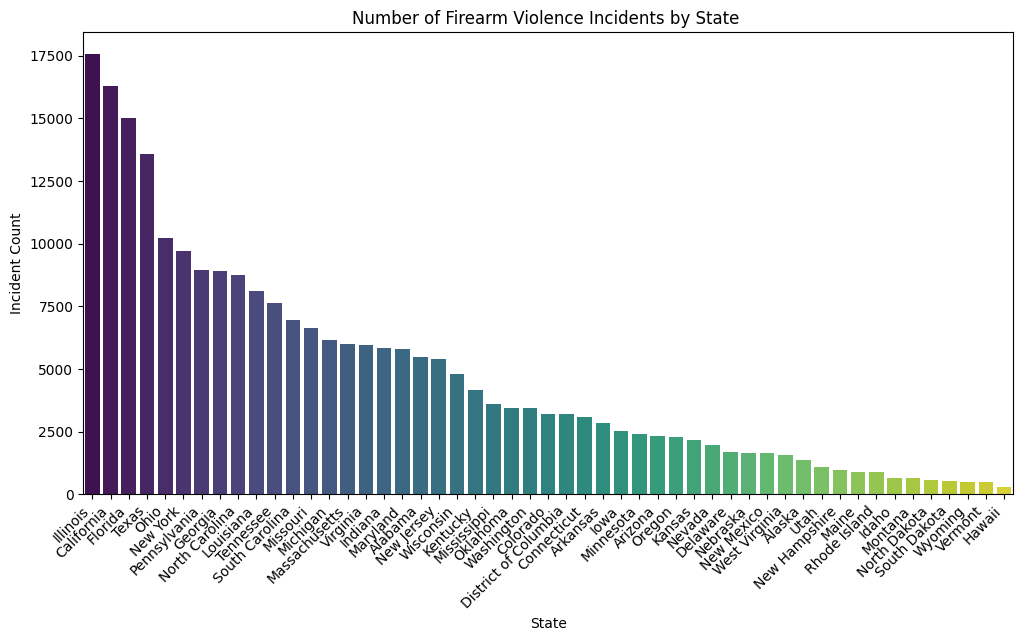

In [82]:
state_count = df['state'].value_counts().reset_index()
state_count.columns = ['state', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='Count', data=state_count, palette='viridis', order=state_count.sort_values('Count', ascending=False)['state'])
plt.xlabel('State')
plt.ylabel('Incident Count')
plt.title('Number of Firearm Violence Incidents by State ')
plt.xticks(rotation=45, ha='right')
plt.show()

In [161]:
state_counts = df['state'].value_counts().reset_index()
state_counts.columns = ['state', 'count']
top_10_states = state_counts.head(10)
top_10_states

,state,count
0,Illinois,17556
1,California,16306
2,Florida,15029
3,Texas,13577
4,Ohio,10244
5,New York,9712
6,Pennsylvania,8929
7,Georgia,8925
8,North Carolina,8739
9,Louisiana,8103


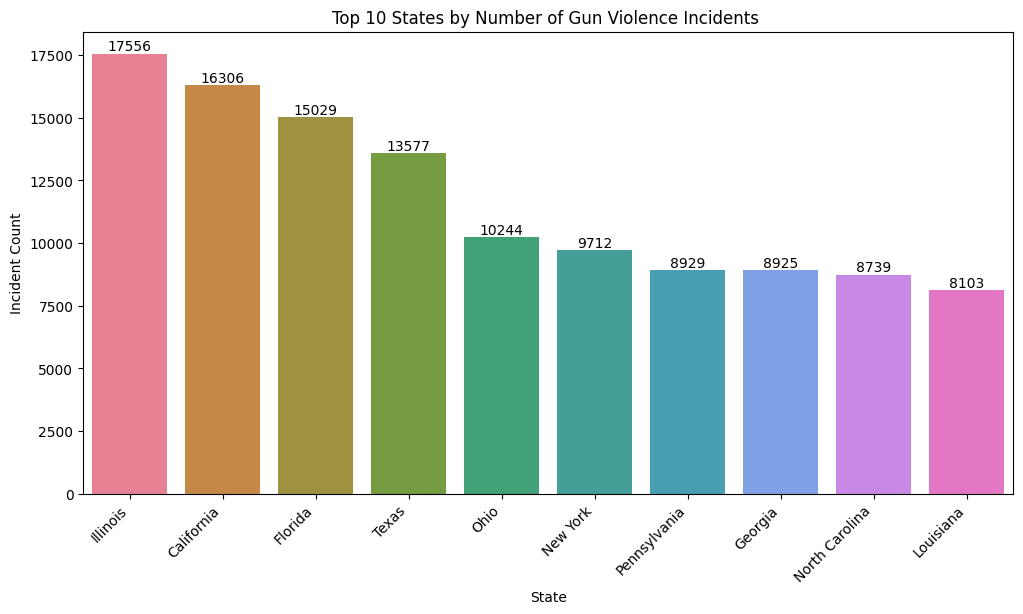

In [162]:
plt.figure(figsize=(12, 6))
top_10bar_state = sns.barplot(x='state', y='count', data=top_10_states, palette='husl')
for bars in top_10bar_state.containers:
    top_10bar_state.bar_label(bars)
plt.xlabel('State')
plt.ylabel('Incident Count')
plt.title('Top 10 States by Number of Gun Violence Incidents ')
plt.xticks(rotation=45, ha='right')
plt.show()

#### 2. Are there time trends in gun violence? Can we identify specific seasons or periods that might influence the frequency of occurrence?

In [85]:
df['date'] = pd.to_datetime(df['date'])

In [86]:
df['month_name'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year

In [175]:
average_incidents_by_month = incidents_by_month.groupby('month_name')['incident count'].mean().reset_index(name='average incident count')
average_incidents_by_month

,month_name,average incident count
0,April,"3,726"
1,August,"4,208"
2,December,"3,621"
3,February,"3,140"
4,January,"3,848"
5,July,"4,225"
6,June,"3,751"
7,March,"3,773"
8,May,"3,986"
9,November,"3,595"


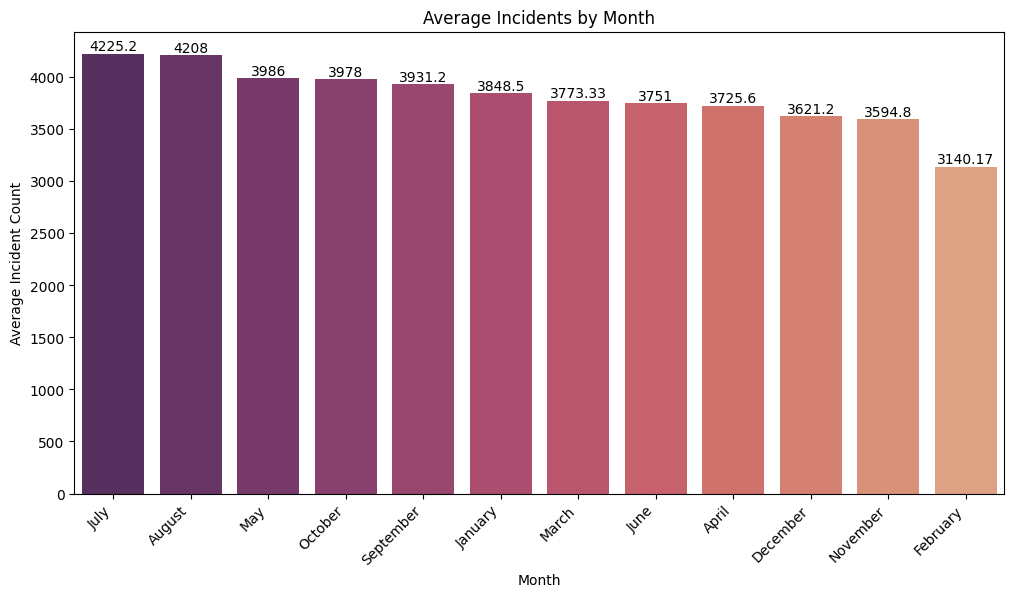

In [184]:
average_incidents_by_month_sorted = average_incidents_by_month.sort_values(by='average incident count', ascending=False)

plt.figure(figsize=(12, 6))
mean_month = sns.barplot(x='month_name', y='average incident count', data=average_incidents_by_month_sorted, palette='flare_r')
for bars in mean_month.containers:
    mean_month.bar_label(bars) 
plt.xlabel('Month')
plt.ylabel('Average Incident Count')
plt.title('Average Incidents by Month')
plt.xticks(rotation=45, ha='right') 
plt.show()

In [167]:
average_incidents_by_year = incidents_by_month.groupby('year')['incident count'].mean().reset_index(name='average incident count')
average_incidents_by_year

,year,average incident count
0,2013,23
1,2014,"4,321"
2,2015,"4,465"
3,2016,"4,897"
4,2017,"5,117"
5,2018,"4,601"


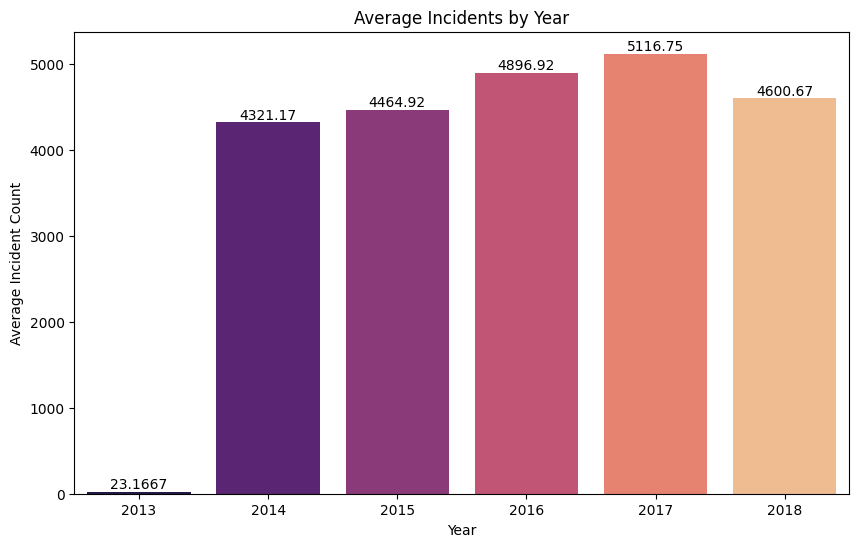

In [171]:
plt.figure(figsize=(10, 6))
mean_year = sns.barplot(x='year', y='average incident count', data=average_incidents_by_year, palette='magma')
for bars in mean_year.containers:
    mean_year.bar_label(bars)
plt.xlabel('Year')
plt.ylabel('Average Incident Count')
plt.title('Average Incidents by Year')
plt.show()

In [168]:
incidents_by_month = df.groupby(['month_name', 'year'])['incident_id'].count().reset_index(name='incident count')
incidents_by_month

,month_name,year,incident count
0,April,2013,17
1,April,2014,3891
2,April,2015,4471
3,April,2016,4672
4,April,2017,5577
...,...,...,...
58,September,2013,28
59,September,2014,5052
60,September,2015,4849
61,September,2016,4937


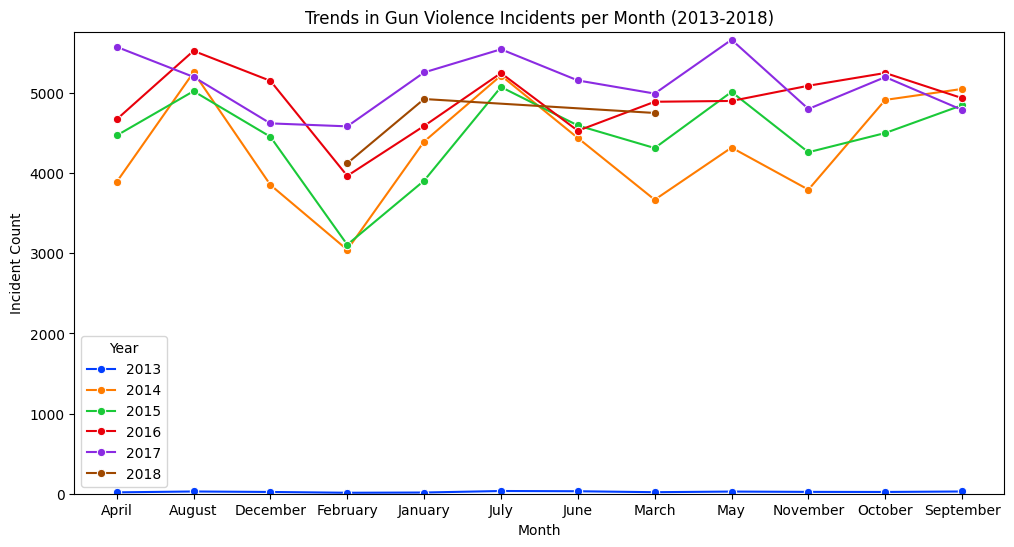

In [169]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='month_name', y='incident count', hue='year', data=incidents_by_month, marker='o', palette='bright')
plt.ylim(0, max(incidents_by_month['incident count'] + 100))
plt.xlabel('Month')
plt.ylabel('Incident Count')
plt.title('Trends in Gun Violence Incidents per Month (2013-2018)')
plt.legend(title='Year')
plt.show()

#### 3. What are the most common types of firearms involved in incidents? Are there certain patterns in event characteristics, such as specific places that can be identified?

In [89]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district', 'month_name', 'year'],
      dtype='object')

In [145]:
df['gun_type'] = df['gun_type'].replace(r'^0::', '', regex=True)
most_common_gun_type = df['gun_type'].value_counts().reset_index()
most_common_gun_type.columns = ['Gun Type', 'Count']
top_10_guntype = pd.DataFrame(most_common_gun_type.head(12))
top_10_guntype

,Gun Type,Count
0,0,99451
1,Unknown,93559
2,Handgun,13018
3,9mm,4599
4,Unknown||1::Unknown,2410
5,22 LR,2193
6,Shotgun,2151
7,40 SW,1947
8,380 Auto,1844
9,45 Auto,1537


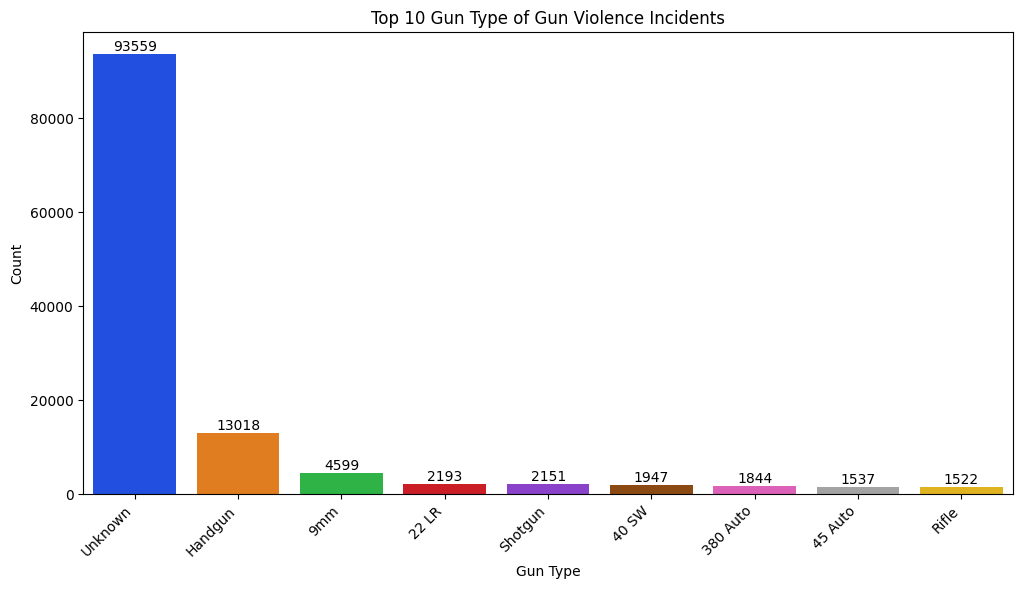

In [147]:
data = {'Gun Type': ['0', 'Unknown', 'Handgun', '9mm', '22 LR', 'Shotgun', '40 SW', '380 Auto', '45 Auto', 'Rifle'],
        'Count': [99451, 93559, 13018, 4599, 2193, 2151, 1947, 1844, 1537, 1522]}
df_guntype = pd.DataFrame(data)

filtered_df = df_guntype[df_guntype['Gun Type'] != '0']

plt.figure(figsize=(12, 6))
top_10_guntype = sns.barplot(x='Gun Type', y='Count', data=filtered_df, palette='bright')
for bars in top_10_guntype.containers:
    top_10_guntype.bar_label(bars)
plt.xlabel('Gun Type')
plt.ylabel('Count')
plt.title('Top 10 Gun Type of Gun Violence Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()

In [127]:
most_common_location = df['location_description'].value_counts().reset_index()
most_common_location.columns = ['Location', 'Count']
top_10_location = most_common_location.head(12)
top_10_location

,Location,Count
0,0,197588
1,Austin,240
2,Walmart,232
3,7-Eleven,166
4,Motel 6,152
5,McDonald's,150
6,Dallas/Ft Worth Intl Airport (DFW),132
7,WalMart,119
8,Dollar General,107
9,Shell,103


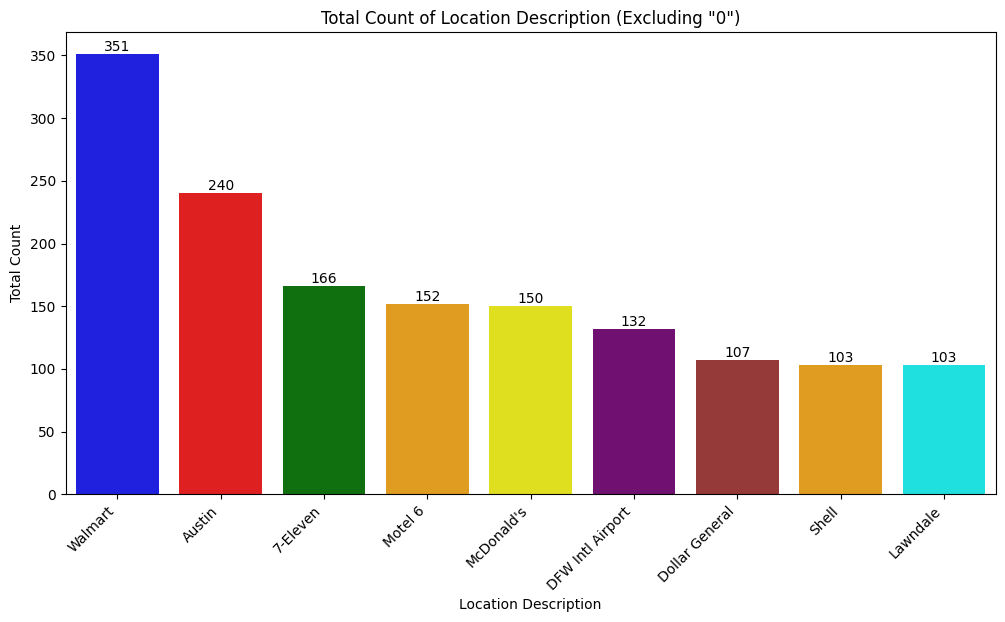

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

data = {'location_description': ['0', 'Walmart', 'Austin', '7-Eleven', 'Motel 6', 'McDonald\'s', 'DFW Intl Airport', 'Dollar General', 'Shell', 'Lawndale'],
        'count': [197588, 351, 240, 166, 152, 150, 132, 107, 103, 103]}
df_location = pd.DataFrame(data)

filtered_df = df_location[df_location['location_description'] != '0']

location_colors = {'Walmart': 'blue', 'Austin': 'red', '7-Eleven': 'green', 'Motel 6': 'orange',
                   'McDonald\'s': 'yellow', 'DFW Intl Airport': 'purple', 'Dollar General': 'brown',
                   'Shell': 'orange', 'Lawndale': 'cyan'}

colors = [location_colors[location] for location in filtered_df['location_description']]

plt.figure(figsize=(12, 6))
total_count_location = sns.barplot(x='location_description', y='count', data=filtered_df, palette=colors)
for bars in total_count_location.containers:
    total_count_location.bar_label(bars)
plt.xlabel('Location Description')
plt.ylabel('Total Count')
plt.title('Total Count of Location Description (Excluding "0")')
plt.xticks(rotation=45, ha='right')
plt.show()


#### 4. What is the distribution of incidents of firearm violence based on age groups and gender? Is there a correlation between demographic factors and levels of violence?

In [94]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district', 'month_name', 'year'],
      dtype='object')

In [123]:
df['participants'] = df['participant_gender'].str.split('\|\|')

all_participants = [participant for sublist in df['participants'].dropna() for participant in sublist]

gender_counts = pd.Series(all_participants).value_counts().head(10)

gender_table = pd.DataFrame({'Gender': gender_counts.index, 'Count': gender_counts.values})
gender_table

,Gender,Count
0,0::Male,168382
1,1::Male,85581
2,2::Male,30032
3,0::Female,24623
4,3::Male,11671
5,1::Female,11513
6,4::Male,4469
7,2::Female,3518
8,5::Male,1814
9,3::Female,1460


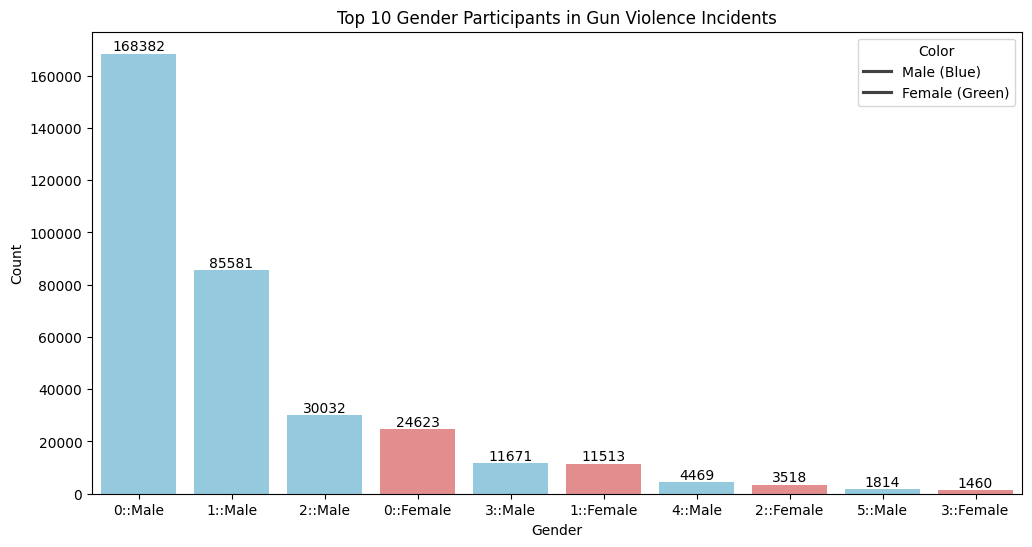

In [124]:
colors = ['skyblue' if 'Male' in gender else 'lightcoral' for gender in gender_counts.index]

plt.figure(figsize=(12, 6))
top_10_gender = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=colors)

for bars in top_10_gender.containers:
    top_10_gender.bar_label(bars)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Top 10 Gender Participants in Gun Violence Incidents')
plt.xticks(rotation=0)

plt.legend(title='Color', labels=['Male (Blue)', 'Female (Green)'])

plt.show()

In [158]:
df['participants'] = df['participant_age'].str.split('\|\|')

all_participants = [participant for sublist in df['participants'].dropna() for participant in sublist]

age_counts = pd.Series(all_participants).value_counts().head(10)

age_table = pd.DataFrame({'Age': age_counts.index, 'Count': age_counts.values})
age_table
profitpr;;sdklfmklesfmklzdsnfkn sd

,Age,Count
0,19,5964
1,22,5722
2,23,5708
3,20,5673
4,24,5667
5,21,5655
6,18,5610
7,25,5277
8,26,4891
9,27,4541


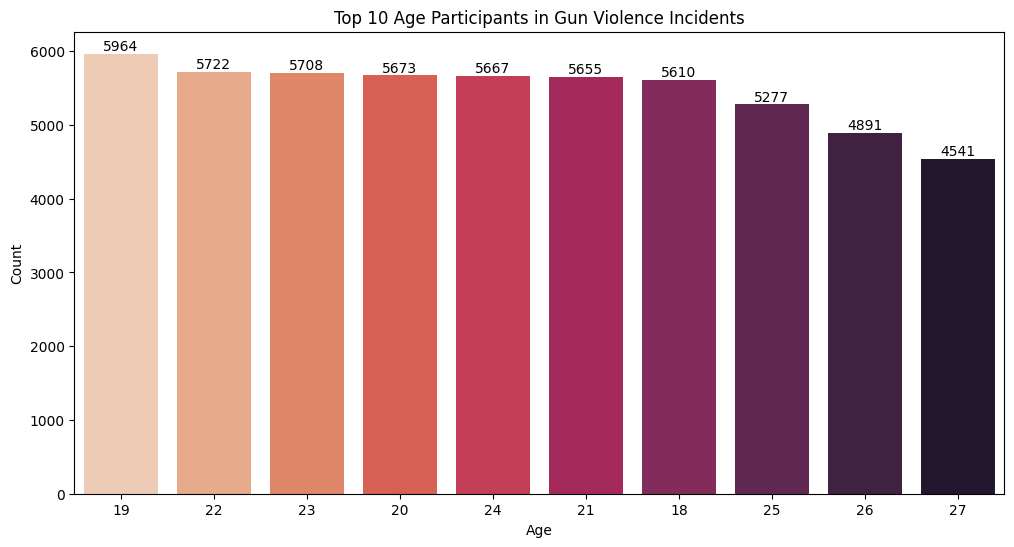

In [159]:
plt.figure(figsize=(12, 6))
top_10_age = sns.barplot(x=age_counts.index, y=age_counts.values, palette='rocket_r')
for bars in top_10_age.containers:
    top_10_age.bar_label(bars)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Top 10 Age Participants in Gun Violence Incidents')
plt.xticks(rotation=0)
plt.show()

#### 5. What is the distribution of the number of killed and injured victims? Is there a pattern in relation to the highest number of shooting incidents by state?

In [99]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district', 'month_name', 'year', 'participants'],
      dtype='object')

In [100]:
total_killed = df['n_killed'].sum()
total_injured = df['n_injured'].sum()

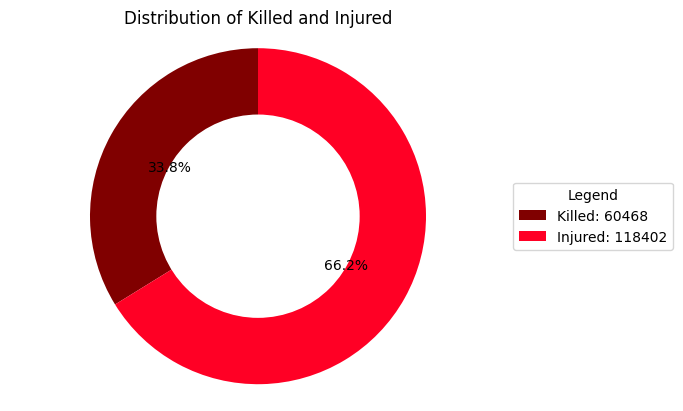

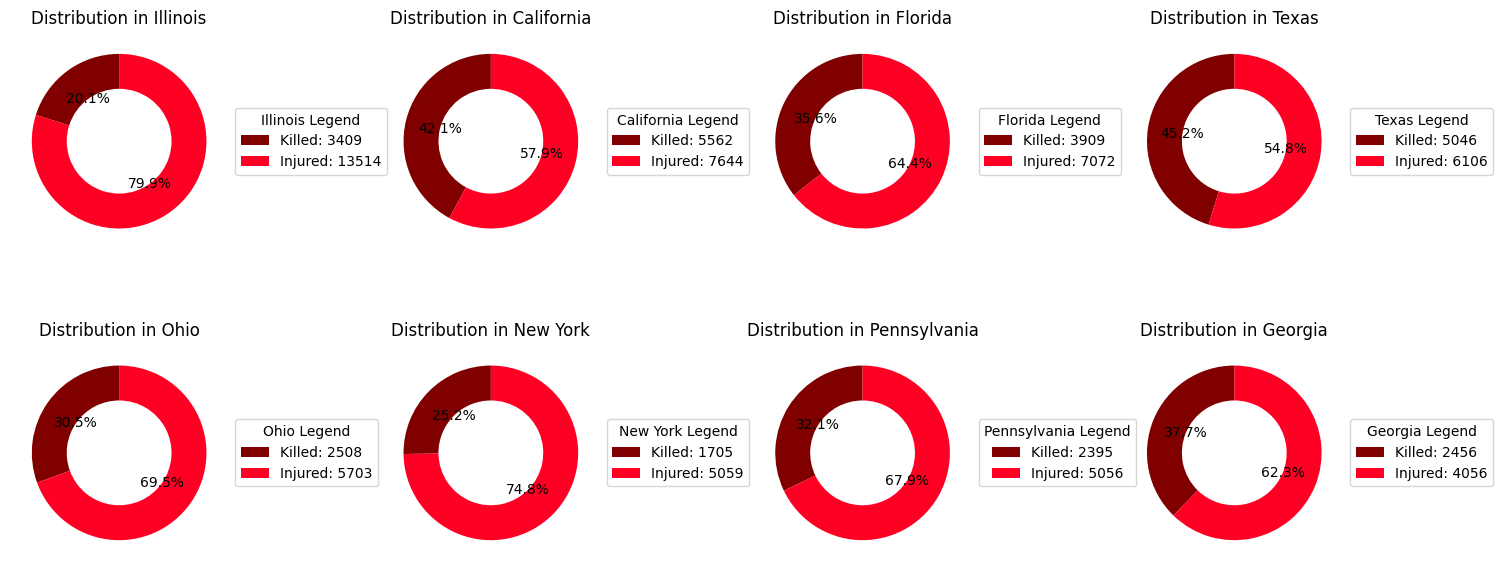

In [186]:
labels = ['Killed', 'Injured']
sizes = [total_killed, total_injured]

colors = sns.color_palette(['#800000', '#FF0025'])

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=None, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.4))

centre_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
ax.add_patch(centre_circle)

plt.title('Distribution of Killed and Injured')

legend_labels = [f'{label}: {size}' for label, size in zip(labels, sizes)]
ax.legend(wedges, legend_labels, title='Legend', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')  

plt.figure(figsize=(15, 10))
top_10_states = df['state'].value_counts().head(8).index
for i, state in enumerate(top_10_states, start=1):
    plt.subplot(3, 4, i)
    state_data = df[df['state'] == state]
    state_total_killed = state_data['n_killed'].sum()
    state_total_injured = state_data['n_injured'].sum()
    state_sizes = [state_total_killed, state_total_injured]
    wedges, texts, autotexts = plt.pie(state_sizes, labels=None, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.4))
    
    legend_labels = [f'{label}: {size}' for label, size in zip(labels, state_sizes)]
    plt.legend(wedges, legend_labels, title=f'{state} Legend', loc='center left', bbox_to_anchor=(1, 0.5))

    plt.title(f'Distribution in {state}')

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

## The Result

1. According to the graphic results, the distribution of shooting incidents based on state is relatively even in the US. The first state with the highest number of shootings is Illinois, with 17,556 cases, and the lowest is Hawaii, with only 289 cases. It can also be seen that the large and busy cities in the US, such as California, Florida, Texas, Ohio and New York, have averages at the top.
2. The trend in shooting cases is significantly related to the graph that has been produced. As there was a spike between 2013 and 2014, it rose to around 18,639.13%. In the first graph, you can see that the highest average number of cases occurred in 2017, namely in May. Then, the highest moderate cases by month occurred in July and August; after research, it turned out that these months were very closely related to the world of US politics. Meanwhile, the lowest average cases occurred in February, with an average of 3140 cases.
3. Based on the graph produced, most of the pistols used in the existing cases were Unknown or unknown, amounting to 93 thousand cases; the second most numerous were Handguns (guns that are easy to access). Then, the place where the most shooting cases were identified was Walmart, with a total of 351 cases.
4. The perpetrator in this shooting case was also inseparable from gender identity and age. In the gender graph, it appears that the most common gender graph for the first, second and third perpetrators is male. Then, the first female perpetrator was in fourth place. What is surprising is that the majority of shooting perpetrators are teenagers, namely 18-25, with an average of more than 5,000 cases. The highest age of perpetrators was 19 years old, with 5964 cases.
5. The distribution of injured and fatally shot victims is still dominated by wounded victims, with more than 118 thousand cases. Meanwhile, there were more than 60 thousand victims who were shot dead. Of the top 10 states, cases of death due to shootings are in Texas at 45.2% and in second place is California at 42.1%. Even though Illinois ranks first in the state with the highest number of shooting cases, in almost 3/4 of the cases, the victims only suffered injuries.

## Suggestion

1. Strengthening Surveillance and Security
    In states with high rates of gun violence, such as Illinois, the government and police must bolster surveillance and security measures. This includes:
    - Increased Patrols: Deploying additional police officers to patrol high-risk areas, particularly during peak crime hours, can deter potential offenders and provide a sense of safety for residents.
    - Enhanced Security in Large Cities: Implementing stricter security protocols in large cities, such as metal detectors, access control systems, and regular security checks, can minimize the risk of gun violence in densely populated areas.
    - Strict Control of Illegal Weapons: Collaborating between government agencies, law enforcement, and community organizations to identify, intercept, and seize illegal firearms is crucial to disrupting the flow of weapons into the hands of criminals.

2. Focusing on Prevention in Critical Months
    Recognizing the pattern of increased shooting incidents during specific months, such as May and July, the government and police should prioritize proactive measures during these periods:
    - Heightened Presence: Increasing police presence in high-risk areas during these critical months can serve as a deterrent and enhance public safety.
    - Targeted Prevention Programs: Implementing targeted prevention programs, such as community outreach initiatives and mental health support services, can address potential risk factors and prevent violence before it occurs.

3. Increased Surveillance in Public Places
    Given the prevalence of shootings in public spaces like Walmart, enhanced surveillance and security measures are essential:
    - Strategic Surveillance: Deploying surveillance cameras and undercover officers in public spaces, particularly those with a history of shootings, can deter potential offenders and provide law enforcement with real-time monitoring capabilities.
    - Enhanced Security Training for Public Place Staff: Providing security training for staff in public places, such as malls, schools, and transportation hubs, can equip them to identify and respond to suspicious activity.

4. Intensification of Control Against Illegal Weapons
    With the majority of weapons used in shooting cases being unknown or handguns, the government must strengthen measures to control illegal weapons:
    - Background Checks and Licensing: Implementing stricter background checks for all firearm purchases, including online purchases, and enforcing comprehensive licensing requirements can prevent firearms from falling into the wrong hands.
    - Ammunition Control: Implementing regulations on ammunition sales, such as limiting bulk purchases and requiring background checks for ammunition purchases, can restrict access to ammunition for those who pose a risk of violence.

5. Youth Violence Prevention Program
    Since most shooters fall within the 18-25 age group, comprehensive youth violence prevention programs are crucial:
    - Early Intervention Programs: Implementing early intervention programs that identify and address risk factors for violence among youth, such as mental health issues, family dysfunction, and exposure to violence, can prevent potential offenders from resorting to violence.
    - Socialization and Support Services: Providing opportunities for socialization, mentorship, and access to mental health support services can help at-risk youth develop positive coping mechanisms and reduce their likelihood of engaging in violent behavior.

6. Increased Public Awareness
    Public awareness campaigns are essential to educate individuals about gun violence and promote responsible gun ownership practices:
    - Danger of Gun Violence: Educating the public about the dangers of gun violence, including the potential for unintended injuries and fatalities, can encourage responsible gun ownership and reduce the misuse of firearms.
    - Reporting Suspicious Activity: Encouraging the public to report suspicious activity, such as threats of violence or unusual behavior, can assist law enforcement in preventing potential incidents.
    - Responsible Gun Ownership: Promoting safe storage practices, proper handling of firearms, and responsible gun ownership education can minimize the risk of accidental shootings and gun-related accidents.

7. Strengthening Victim Management
    The government must strengthen victim management efforts to support those affected by gun violence:
    - Mental Health Services: Providing mental health services and psychological support to victims of gun violence, including those who have witnessed or been directly impacted by shootings, can address trauma, anxiety, and other emotional distress.
    - Family Support Services: Offering comprehensive support services to families of victims, including financial assistance, grief counseling, and advocacy, can help them cope with the loss and navigate the aftermath of a tragedy.

8. Cross-Sector Collaboration
    Addressing gun violence effectively necessitates a concerted effort that transcends traditional boundaries:
    - Government-Police Collaboration: Fostering open communication channels between government agencies and law enforcement can facilitate information sharing, resource allocation, and coordinated responses to gun violence incidents.
    - Community Engagement: Engaging community organizations, neighborhood groups, and local stakeholders in prevention and intervention efforts can foster trust, increase community involvement, and address localized risk factors.
